In [1]:
!gdown 1AnomdMt_HRA888Ov62nlY_RoGxxQJan_

Downloading...
From: https://drive.google.com/uc?id=1AnomdMt_HRA888Ov62nlY_RoGxxQJan_
To: /content/th_food_small.zip
100% 506M/506M [00:08<00:00, 62.1MB/s]


In [2]:
!unzip -o -q th_food_small.zip

In [3]:
dataset_path="th_food_small"

In [4]:
IMAGE_SIZE = 128
BATCH_SIZE = 64

In [5]:
# Imports
import os, warnings
import matplotlib.pyplot as plt
from matplotlib import gridspec

import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Reproducability
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

# Set Matplotlib defaults
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells


# Load training and validation sets
ds_train_ = image_dataset_from_directory(
    dataset_path + '/train',
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    dataset_path + '/val',
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)
ds_test_ = image_dataset_from_directory(
    dataset_path + '/test',
    labels='inferred',
    label_mode='categorical',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 1700 files belonging to 6 classes.
Found 362 files belonging to 6 classes.
Found 371 files belonging to 6 classes.


In [6]:
# Data Pipeline
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_test = (
    ds_test_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

In [12]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    # CNN
    layers.Conv2D(50,3, padding='same', activation = 'relu', input_shape=(128, 128, 3)),
    layers.MaxPooling2D(),
    layers.Conv2D(64,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128,3, padding='same', activation = 'relu'),
    layers.MaxPooling2D(),


    # Classification
    layers.Flatten(),
    layers.Dense(128, activation="relu"),
    layers.Dense(6, activation='softmax'),
])

In [13]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=50,
    verbose=1,
)

Epoch 1/50
27/27 [==============================] - 5s 60ms/step - loss: 1.8756 - accuracy: 0.2600 - val_loss: 1.7253 - val_accuracy: 0.2403
Epoch 2/50
27/27 [==============================] - 1s 42ms/step - loss: 1.6771 - accuracy: 0.3082 - val_loss: 1.6499 - val_accuracy: 0.3812
Epoch 3/50
27/27 [==============================] - 1s 43ms/step - loss: 1.5255 - accuracy: 0.3882 - val_loss: 1.4776 - val_accuracy: 0.4033
Epoch 4/50
27/27 [==============================] - 1s 43ms/step - loss: 1.3366 - accuracy: 0.4700 - val_loss: 1.3964 - val_accuracy: 0.4392
Epoch 5/50
27/27 [==============================] - 1s 42ms/step - loss: 1.1777 - accuracy: 0.5476 - val_loss: 1.3412 - val_accuracy: 0.4586
Epoch 6/50
27/27 [==============================] - 1s 43ms/step - loss: 1.0035 - accuracy: 0.6294 - val_loss: 1.4213 - val_accuracy: 0.4807
Epoch 7/50
27/27 [==============================] - 1s 43ms/step - loss: 0.8291 - accuracy: 0.6988 - val_loss: 1.6492 - val_accuracy: 0.4641
Epoch 8/50
27

In [9]:
import numpy as np
from PIL import Image

def imageToArray(imageName):

  # Load the image and resize it to the desired dimensions
  image_path =imageName
  width, height = 128, 128  # Replace with the dimensions required by your model

  image = Image.open(image_path)
  image = image.resize((width, height))


  # Convert the image to a NumPy array and normalize the pixel values (if necessary)
  image_array = np.asarray(image)
  image_array = image_array / 255.0  # Normalize the pixel values between 0 and 1


  # Reshape the image array to match the input shape of your model
  image_array = image_array.reshape(1, width, height, 3)  # Assumes the input shape is (width, height, 3)

  return image_array

1/1 [==============================] - 0s 28ms/step
Image: th_food_small/test/KhanomJeenNamYaKati/201.jpg


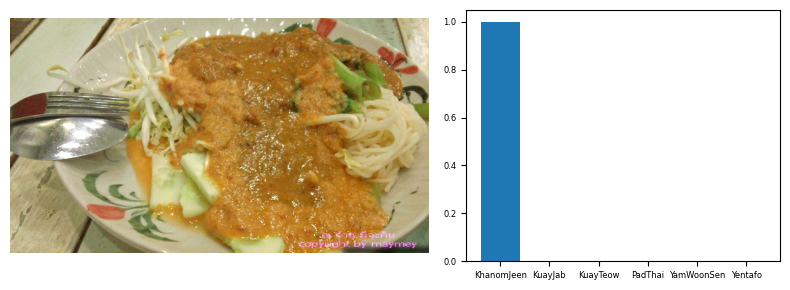

1/1 [==============================] - 0s 27ms/step
Image: th_food_small/test/KuayJab/586.jpg


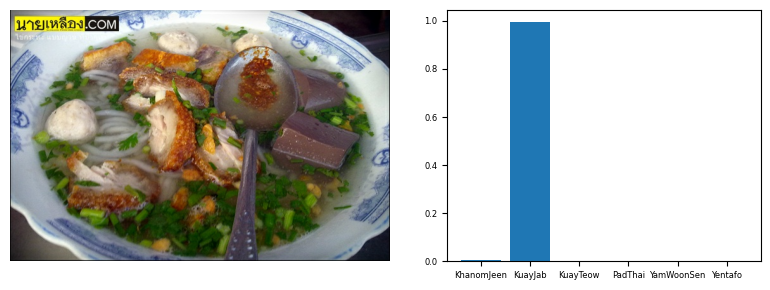

1/1 [==============================] - 0s 27ms/step
Image: th_food_small/test/PadThai/1854.jpg


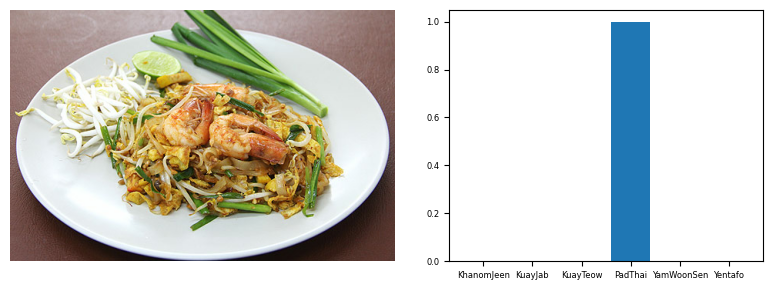

1/1 [==============================] - 0s 31ms/step
Image: th_food_small/test/KhanomJeenNamYaKati/281.jpg


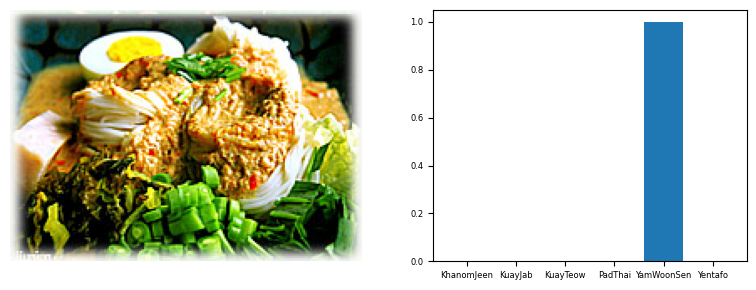

1/1 [==============================] - 0s 34ms/step
Image: th_food_small/test/KuayTeowReua/197.jpg


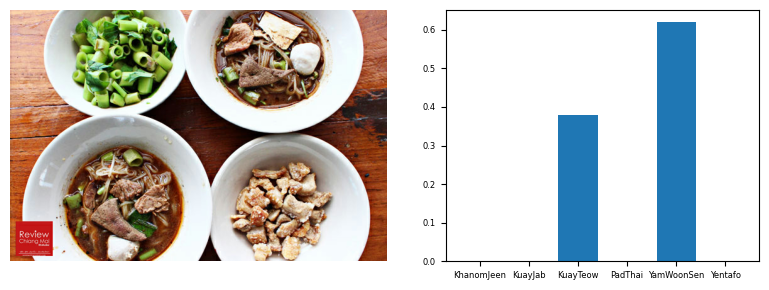

In [11]:
import tensorflow as tf
import matplotlib.pyplot as plt
import random

randomlist = []
for i in range(0,5):
  n = random.randrange(0, 369, 1)
  randomlist.append(n)


for i in randomlist:
  image_path = ds_test_.file_paths[i]
  image_array=imageToArray(image_path)
  preds = model.predict(image_array)
  print("Image: " + image_path)


  # create 2 subplots
  f, axarr = plt.subplots(1,2, figsize=(8, 3), gridspec_kw={'width_ratios': [2, 1.5]})


  # Show Image
  image = tf.io.read_file(image_path)
  image = tf.io.decode_jpeg(image)
  axarr[0].imshow(tf.squeeze(image), cmap='gray')
  axarr[0].axis('off')


  # Plot histogram (Predicted Prob)
  axarr[1].bar(['KhanomJeen', 'KuayJab', 'KuayTeow', 'PadThai', 'YamWoonSen', 'Yentafo'],preds[0])
  plt.xticks( fontsize=6)
  plt.yticks( fontsize=6)

  plt.show()
